In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [5]:
df.shape

(3566, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,pyramid elite,sector 86,0.46,6751.0,2.0,2.0,1,0.0,Under Construction,681.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0
3,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0


In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sector 86,0.46,2.0,2.0,1,0.0,Under Construction,681.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0
3,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0


<ipython-input-9-29eb114f537c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<AxesSubplot: >

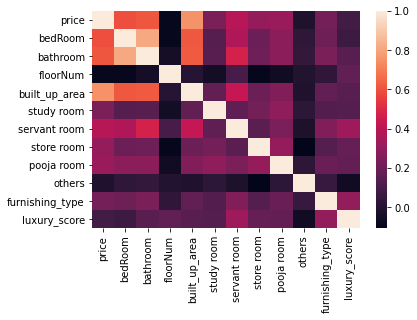

In [9]:
sns.heatmap(train_df.corr())

In [11]:
train_df.corr()['price'].sort_values(ascending=False)

<ipython-input-11-8f32b8306ca3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['price'].sort_values(ascending=False)


price              1.000000
built_up_area      0.750848
bathroom           0.610680
bedRoom            0.592093
servant room       0.393181
pooja room         0.320840
store room         0.305971
study room         0.242074
furnishing_type    0.226082
luxury_score       0.092176
others            -0.012864
floorNum          -0.087406
Name: price, dtype: float64

In [12]:
#cols in question

#numerical--> luxury_score, floorNum
# categorical--> property_type, sector,agePossession

In [13]:
train_df.to_csv('train.csv')